## LIBRARIES

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.core.error import IPythonCoreError

In [6]:
import warnings
warnings.filterwarnings("ignore")

# DATASETS LOADING



In [7]:
data = pd.read_csv('/content/drive/MyDrive/Breast cancer.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [8]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave_points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
data.shape,data.size

((569, 32), 18208)

In [ ]:
sns.pairplot(data=data, corner=True)
plt.show()

# TRAINING & TESTING

In [11]:
train= pd.read_csv('/content/drive/MyDrive/Breast cancer.csv')
test= pd.read_csv('/content/drive/MyDrive/Breast cancer.csv')


In [12]:
train.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [13]:
test.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

#Changing Axis values

In [14]:
data.set_axis(['Id','Diagnosis','Radius','Texture','Perimeter','Area','Smootheness','Compactness','Concavity','Concave_points','Symmetry','Fractal_dimension','Radius_se','Texture_se','Perimetr_se','Area_se','Smoothness_se','Compactness_se','Concavity_se','Concave_points_se','Symmetry_se','Fractal_dimension_se','Radius_worst','Texture_worst','Perimeter_worst','Area_worst','Smootheness_worst','Compactness_worst','Concavity_worst','Concave_points_worst','Symmetry_worst','Breast_cancer'], axis='columns',inplace=True)

In [15]:
data.head()

Id Diagnosis  Radius  Texture  Perimeter    Area  Smootheness  \
0    842302         M   17.99    10.38     122.80  1001.0      0.11840   
1    842517         M   20.57    17.77     132.90  1326.0      0.08474   
2  84300903         M   19.69    21.25     130.00  1203.0      0.10960   
3  84348301         M   11.42    20.38      77.58   386.1      0.14250   
4  84358402         M   20.29    14.34     135.10  1297.0      0.10030   

   Compactness  Concavity  Concave_points  ...  Radius_worst  Texture_worst  \
0      0.27760     0.3001         0.14710  ...         25.38          17.33   
1      0.07864     0.0869         0.07017  ...         24.99          23.41   
2      0.15990     0.1974         0.12790  ...         23.57          25.53   
3      0.28390     0.2414         0.10520  ...         14.91          26.50   
4      0.13280     0.1980         0.10430  ...         22.54          16.67   

   Perimeter_worst  Area_worst  Smootheness_worst  Compactness_worst  \
0           184.60      2019.0             0.1622             0.6656   
1           158.80      1956.0             0.1238             0.1866   
2           152.50      1709.0             0.1444             0.4245   
3            98.87       567.7             0.2098             0.8663   
4           152.20      1575.0             0.1374             0.2050   

   Concavity_worst  Concave_points_worst  Symmetry_worst  Breast_cancer  
0           0.7119                0.2654          0.4601        0.11890  
1           0.2416                0.1860          0.2750        0.08902  
2           0.4504                0.2430          0.3613        0.08758  
3           0.6869                0.2575          0.6638        0.17300  
4           0.4000                0.1625          0.2364        0.07678  

[5 rows x 32 columns]

#DATA CLEANING & PROCESSING

In [16]:
data.isnull().sum()

Id                      0
Diagnosis               0
Radius                  0
Texture                 0
Perimeter               0
Area                    0
Smootheness             0
Compactness             0
Concavity               0
Concave_points          0
Symmetry                0
Fractal_dimension       0
Radius_se               0
Texture_se              0
Perimetr_se             0
Area_se                 0
Smoothness_se           0
Compactness_se          0
Concavity_se            0
Concave_points_se       0
Symmetry_se             0
Fractal_dimension_se    0
Radius_worst            0
Texture_worst           0
Perimeter_worst         0
Area_worst              0
Smootheness_worst       0
Compactness_worst       0
Concavity_worst         0
Concave_points_worst    0
Symmetry_worst          0
Breast_cancer           0
dtype: int64

In [17]:
train.isnull().sum()
print("Train Shape:",train.shape)
test.isnull().sum()
print("Test Shape:",test.shape)

Train Shape: (569, 32)
Test Shape: (569, 32)


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

[]

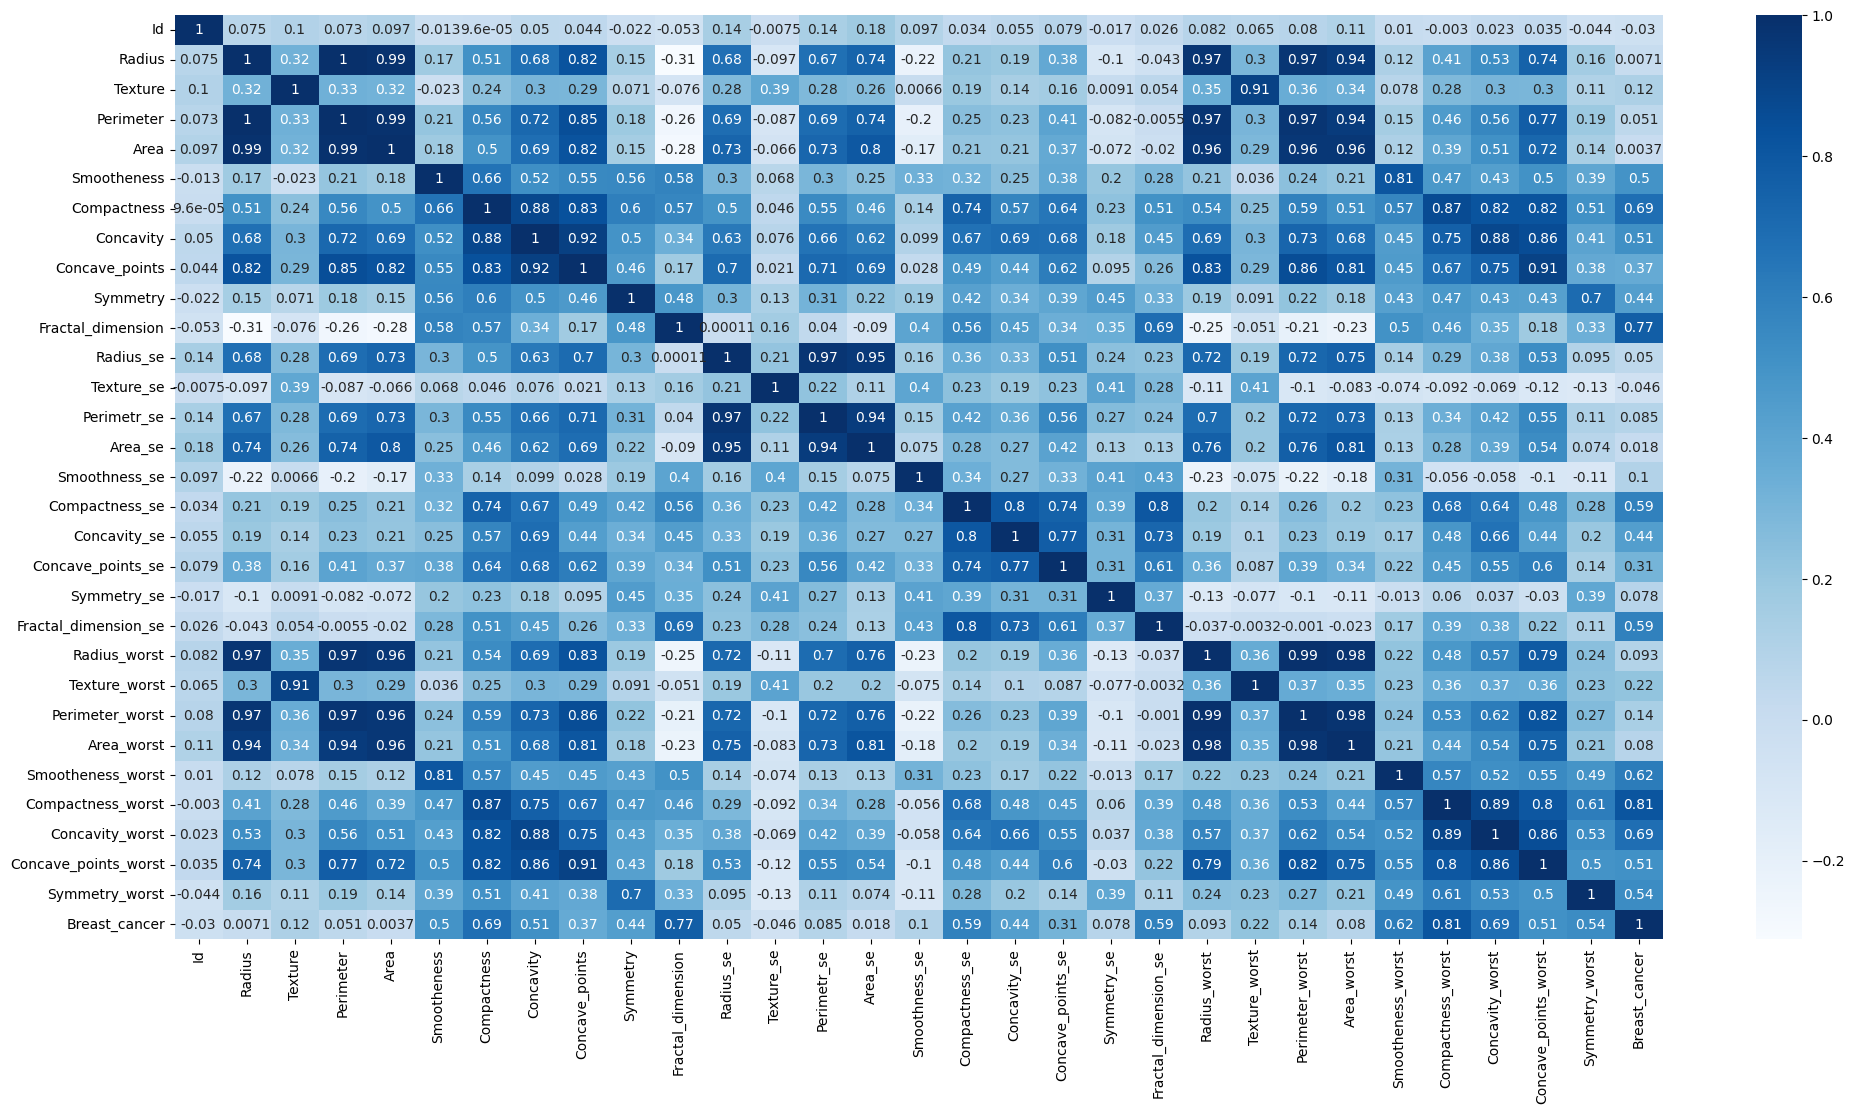

In [20]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

#EDA TESTING

In [2]:
%matplotlib inline
import plotly.express as px

In [31]:
fig=px.bar(data.head(10), x="Breast_cancer",y="Area",color="Concavity",template="ggplot2")
fig.show()

In [36]:
fig = px.pie(data, values='Radius', names='Diagnosis')
fig.show()

In [37]:
fig=px.bar(data.head(100),x='Area',y='Diagnosis',template='ggplot2')
fig.show()

In [38]:
fig = px.line(data, x="Radius", y="Id", color='Breast_cancer',markers=True,color_discrete_sequence=['White','orange'],template='plotly_dark')
fig.show()

In [39]:
df= data.copy()
df.head()


Id Diagnosis  Radius  Texture  Perimeter    Area  Smootheness  \
0    842302         M   17.99    10.38     122.80  1001.0      0.11840   
1    842517         M   20.57    17.77     132.90  1326.0      0.08474   
2  84300903         M   19.69    21.25     130.00  1203.0      0.10960   
3  84348301         M   11.42    20.38      77.58   386.1      0.14250   
4  84358402         M   20.29    14.34     135.10  1297.0      0.10030   

   Compactness  Concavity  Concave_points  ...  Radius_worst  Texture_worst  \
0      0.27760     0.3001         0.14710  ...         25.38          17.33   
1      0.07864     0.0869         0.07017  ...         24.99          23.41   
2      0.15990     0.1974         0.12790  ...         23.57          25.53   
3      0.28390     0.2414         0.10520  ...         14.91          26.50   
4      0.13280     0.1980         0.10430  ...         22.54          16.67   

   Perimeter_worst  Area_worst  Smootheness_worst  Compactness_worst  \
0           184.60      2019.0             0.1622             0.6656   
1           158.80      1956.0             0.1238             0.1866   
2           152.50      1709.0             0.1444             0.4245   
3            98.87       567.7             0.2098             0.8663   
4           152.20      1575.0             0.1374             0.2050   

   Concavity_worst  Concave_points_worst  Symmetry_worst  Breast_cancer  
0           0.7119                0.2654          0.4601        0.11890  
1           0.2416                0.1860          0.2750        0.08902  
2           0.4504                0.2430          0.3613        0.08758  
3           0.6869                0.2575          0.6638        0.17300  
4           0.4000                0.1625          0.2364        0.07678  

[5 rows x 32 columns]

#LABEL ENCODING





In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Diagnosis']=le.fit_transform(df['Diagnosis'])
df['Breast_cancer']=le.fit_transform(df['Breast_cancer'])
df

Id  Diagnosis  Radius  Texture  Perimeter    Area  Smootheness  \
0      842302          1   17.99    10.38     122.80  1001.0      0.11840   
1      842517          1   20.57    17.77     132.90  1326.0      0.08474   
2    84300903          1   19.69    21.25     130.00  1203.0      0.10960   
3    84348301          1   11.42    20.38      77.58   386.1      0.14250   
4    84358402          1   20.29    14.34     135.10  1297.0      0.10030   
..        ...        ...     ...      ...        ...     ...          ...   
564    926424          1   21.56    22.39     142.00  1479.0      0.11100   
565    926682          1   20.13    28.25     131.20  1261.0      0.09780   
566    926954          1   16.60    28.08     108.30   858.1      0.08455   
567    927241          1   20.60    29.33     140.10  1265.0      0.11780   
568     92751          0    7.76    24.54      47.92   181.0      0.05263   

     Compactness  Concavity  Concave_points  ...  Radius_worst  Texture_worst  \
0        0.27760    0.30010         0.14710  ...        25.380          17.33   
1        0.07864    0.08690         0.07017  ...        24.990          23.41   
2        0.15990    0.19740         0.12790  ...        23.570          25.53   
3        0.28390    0.24140         0.10520  ...        14.910          26.50   
4        0.13280    0.19800         0.10430  ...        22.540          16.67   
..           ...        ...             ...  ...           ...            ...   
564      0.11590    0.24390         0.13890  ...        25.450          26.40   
565      0.10340    0.14400         0.09791  ...        23.690          38.25   
566      0.10230    0.09251         0.05302  ...        18.980          34.12   
567      0.27700    0.35140         0.15200  ...        25.740          39.42   
568      0.04362    0.00000         0.00000  ...         9.456          30.37   

     Perimeter_worst  Area_worst  Smootheness_worst  Compactness_worst  \
0             184.60      2019.0            0.16220            0.66560   
1             158.80      1956.0            0.12380            0.18660   
2             152.50      1709.0            0.14440            0.42450   
3              98.87       567.7            0.20980            0.86630   
4             152.20      1575.0            0.13740            0.20500   
..               ...         ...                ...                ...   
564           166.10      2027.0            0.14100            0.21130   
565           155.00      1731.0            0.11660            0.19220   
566           126.70      1124.0            0.11390            0.30940   
567           184.60      1821.0            0.16500            0.86810   
568            59.16       268.6            0.08996            0.06444   

     Concavity_worst  Concave_points_worst  Symmetry_worst  Breast_cancer  
0             0.7119                0.2654          0.4601            506  
1             0.2416                0.1860          0.2750            375  
2             0.4504                0.2430          0.3613            361  
3             0.6869                0.2575          0.6638            533  
4             0.4000                0.1625          0.2364            216  
..               ...                   ...             ...            ...  
564           0.4107                0.2216          0.2060            133  
565           0.3215                0.1628          0.2572             63  
566           0.3403                0.1418          0.2218            244  
567           0.9387                0.2650          0.4087            514  
568           0.0000                0.0000          0.2871            121  

[569 rows x 32 columns]

In [41]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])


In [42]:
X = df.drop('Diagnosis',axis=1)
y = df['Breast_cancer']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

#LINEAR REGRESSION

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# Evalulating training prediction

In [44]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

ytrain_pred = lr.predict(xtrain)

# evaluating the testing data

mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mse))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set
--------------------------------------
MSE is 9.932314164653932e-20
RMSE is 3.1515574189048073e-10
R2 score is 1.0




# Evaluating Testing prediction


In [45]:
ytest_pred = lr.predict(xtest)

mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("the model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

the model performance for training set
--------------------------------------
MSE is 1.3923236302918282e-19
RMSE is 3.731385306145464e-10
R2 score is 1.0




# Final conclusion

In [46]:
mean = data.mean
mean()

Id                      3.037183e+07
Radius                  1.412729e+01
Texture                 1.928965e+01
Perimeter               9.196903e+01
Area                    6.548891e+02
Smootheness             9.636028e-02
Compactness             1.043410e-01
Concavity               8.879932e-02
Concave_points          4.891915e-02
Symmetry                1.811619e-01
Fractal_dimension       6.279761e-02
Radius_se               4.051721e-01
Texture_se              1.216853e+00
Perimetr_se             2.866059e+00
Area_se                 4.033708e+01
Smoothness_se           7.040979e-03
Compactness_se          2.547814e-02
Concavity_se            3.189372e-02
Concave_points_se       1.179614e-02
Symmetry_se             2.054230e-02
Fractal_dimension_se    3.794904e-03
Radius_worst            1.626919e+01
Texture_worst           2.567722e+01
Perimeter_worst         1.072612e+02
Area_worst              8.805831e+02
Smootheness_worst       1.323686e-01
Compactness_worst       2.542650e-01
C

In [47]:
mean=data.mean
mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of            Id Diagnosis  Radius  Texture  Perimeter    Area  Smootheness  \
0      842302         M   17.99    10.38     122.80  1001.0      0.11840   
1      842517         M   20.57    17.77     132.90  1326.0      0.08474   
2    84300903         M   19.69    21.25     130.00  1203.0      0.10960   
3    84348301         M   11.42    20.38      77.58   386.1      0.14250   
4    84358402         M   20.29    14.34     135.10  1297.0      0.10030   
..        ...       ...     ...      ...        ...     ...          ...   
564    926424         M   21.56    22.39     142.00  1479.0      0.11100   
565    926682         M   20.13    28.25     131.20  1261.0      0.09780   
566    926954         M   16.60    28.08     108.30   858.1      0.08455   
567    927241         M   20.60    29.33     140.10  1265.0      0.11780   
568     92751         B    7.76    24.54      47.92   181.0      0.05263   

     Compactness  Concav